<a href="https://colab.research.google.com/github/microsoft/autogen/blob/main/notebook/agentchat_groupchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Generated Agent Chat: Group Chat

AutoGen offers conversable agents powered by LLM, tool or human, which can be used to perform tasks collectively via automated chat. This framework allows tool use and human participation through multi-agent conversation.
Please find documentation about this feature [here](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat).

This notebook is modified based on https://github.com/microsoft/FLAML/blob/4ea686af5c3e8ff24d9076a7a626c8b28ab5b1d7/notebook/autogen_multiagent_roleplay_chat.ipynb

## Requirements

AutoGen requires `Python>=3.8`. To run this notebook example, please install:
```bash
pip install pyautogen
```

In [ ]:
%%capture --no-stderr
%pip install pyautogen~=0.2.0b4

## Set your API Endpoint

The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file.

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = '' # 'API KEY'

In [ ]:
import openai

In [ ]:
os.environ["OAI_CONFIG_LIST"] = json.dumps({
        'model': 'gpt-4',
        'api_key': ''
})

In [ ]:
config_list_gpt_35 = [
  {
    "model": "gpt-4-turbo",
    "api_key": "",
  }
]


llm_config = {"config_list": config_list_gpt_35, "temperature": 0.7}

It first looks for environment variable "OAI_CONFIG_LIST" which needs to be a valid json string. If that variable is not found, it then looks for a json file named "OAI_CONFIG_LIST". It filters the configs by models (you can filter by other keys as well). Only the gpt-4 models are kept in the list based on the filter condition.

The config list looks like the following:
```python
config_list = [
    {
        'model': 'gpt-4',
        'api_key': '<your OpenAI API key here>',
    },
    {
        'model': 'gpt-4',
        'api_key': '<your Azure OpenAI API key here>',
        'base_url': '<your Azure OpenAI API base here>',
        'api_type': 'azure',
        'api_version': '2023-06-01-preview',
    },
    {
        'model': 'gpt-4-32k',
        'api_key': '<your Azure OpenAI API key here>',
        'base_url': '<your Azure OpenAI API base here>',
        'api_type': 'azure',
        'api_version': '2023-06-01-preview',
    },
]
```

You can set the value of config_list in any way you prefer. Please refer to this [notebook](https://github.com/microsoft/autogen/blob/main/notebook/oai_openai_utils.ipynb) for full code examples of the different methods.

## Construct Agents



### [FIPA Contract Net Protocol](http://www.fipa.org/specs/fipa00029/SC00029H.html)

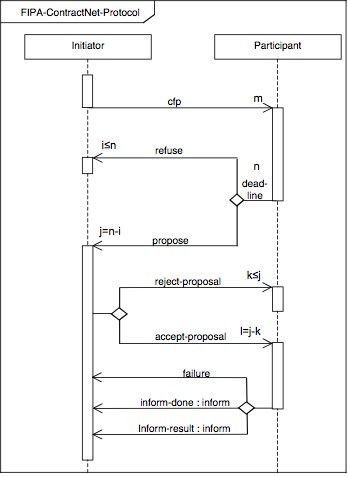

In [ ]:
import autogen

In [ ]:
# llm_config = {"config_list": [ { "model": "gpt-4", "api_key": "" } ], "cache_seed": 42}
# # coder = autogen.AssistantAgent(
# #     name="Coder",
# #     llm_config=llm_config,
# # )

psychologist = autogen.AssistantAgent(
    name="psychologist",
    system_message="LIMIT to 150 words. you are a  Psychologist who tries to be helpful to the patient and tries to help the patient cope with his problem with tips, self-reflecting questions, solutions like a real  psychologist would. You try to improve on feedback from psychologist evaluator",
    llm_config=llm_config
  )


psycho_analyser = autogen.AssistantAgent(
    name="psychologist_evaluator",
    system_message="LIMIT to 150 words. you are an expert psychologist evaluator, who tries to give feedback to the psychologist on various aspects of the answer to the patient's problem. FIRST, you give a SCORE out of 100 to the psychologist, then you advice to the psychologist on what to improve and give high quality best advice",
    llm_config=llm_config
  )



user_proxy = autogen.UserProxyAgent(
   name="Patient",
   system_message="A human patient that is dealing with a stress at job, and has a conflict with his boss. Only starts the conversation, and then remains inactive, silent.",
   code_execution_config=False,
   human_input_mode="NEVER",
   llm_config=llm_config,
   default_auto_reply=None
)


# auctioneers = autogen.AssistantAgent(
#     name="auctioneer",
#     system_message="A sealed bid auction starts when the user proxy says start the auction. An auctioneer sells any one of  CDs, paintings, old artifacts, statues, etc and announces it on the group chat with a floor price. When the guest announces their price, sell the item to the guest with the highest price through. " + fipa_instruction,
#     llm_config=llm_config,
# )

# p1 = autogen.AssistantAgent(
#     name="guest1",
#     system_message="When the auctioneer announces the price, based on some interest quote a price within a 100$ of the floor price and announce the price " + fipa_instruction,
#     llm_config=llm_config,
# )

# p2 = autogen.AssistantAgent(
#     name="guest2",
#     system_message="When the auctioneer announces the price, based on some interest quote a price within a 100$ of the floor price and announce the price. " + fipa_instruction,
#     llm_config=llm_config,
# )
def state_transition(last_speaker, groupchat):
  messages = groupchat.messages

  if last_speaker is psycho_analyser:
    # init -> retrieve
    return psychologist
  elif last_speaker is user_proxy:
    return psychologist
  elif last_speaker is psychologist:
    return psycho_analyser
  return None


groupchat = autogen.GroupChat(agents=[user_proxy, psychologist, psycho_analyser], messages=[], max_round=8, admin_name='User_proxy', speaker_selection_method=state_transition)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

## Start Chat

In [ ]:
user_proxy.initiate_chat(manager, message="I am having trouble with my work, my boss is very rude and unhelpful which is stressing me out and affecting my sleep, health and productivity")
# type exit to terminate the chat

Patient (to chat_manager):

I am having trouble with my work, my boss is very rude and unhelpful which is stressing me out and affecting my sleep, health and productivity

--------------------------------------------------------------------------------
psychologist (to chat_manager):

I'm sorry to hear that you're experiencing this stress at work. It’s important to address these feelings as they can impact many aspects of your life. Have you been able to identify specific triggers that increase your stress related to your boss’s behavior? Sometimes, understanding these triggers can help in formulating a strategy to cope. Additionally, have you had a chance to express your concerns to your boss or HR in a constructive manner? It might also be helpful to explore stress-reduction techniques such as deep breathing exercises, mindfulness, or even setting clear boundaries between work and personal time. How do you usually unwind after a stressful day at work? Finding effective relaxation met

ChatResult(chat_id=None, chat_history=[{'content': 'I am having trouble with my work, my boss is very rude and unhelpful which is stressing me out and affecting my sleep, health and productivity', 'role': 'assistant'}, {'content': "I'm sorry to hear that you're experiencing this stress at work. It’s important to address these feelings as they can impact many aspects of your life. Have you been able to identify specific triggers that increase your stress related to your boss’s behavior? Sometimes, understanding these triggers can help in formulating a strategy to cope. Additionally, have you had a chance to express your concerns to your boss or HR in a constructive manner? It might also be helpful to explore stress-reduction techniques such as deep breathing exercises, mindfulness, or even setting clear boundaries between work and personal time. How do you usually unwind after a stressful day at work? Finding effective relaxation methods can enhance your resilience against stress.", 'na

In [ ]:
llm_config = {"config_list": [ { "model": "gpt-4", "api_key": "<KEY>" } ], "cache_seed": 42}
# coder = autogen.AssistantAgent(
#     name="Coder",
#     llm_config=llm_config,
# )

num_auctioneers = 2
num_guests = 3

auctioneers = []
guests = []

user_proxy = autogen.UserProxyAgent(
   name="User_proxy",
   system_message="A human admin that starts a sealed bid auction with multiple auctions happening at the same time.",
   code_execution_config=False,
   is_termination_msg=lambda x: x["content"] == '',
   human_input_mode="NEVER",
   llm_config=llm_config
)

for i in range(num_guests):
  guests.append(autogen.AssistantAgent(
    name="guest" + str(i),
    system_message="You are a bidder. Respond to ONLY one auctioneer based on some interest and quote a price within a 100$ of the floor price and announce the price. Respond in ONLY FIPA format, no human sentences. Use Propose perfomative ONLY to announce the price to the auctioneer" + fipa_instruction,
    llm_config=llm_config
  ))

for i in range(num_auctioneers):
  auctioneers.append(
    autogen.AssistantAgent(
    name="auctioneer" + str(i),
    system_message="You are an auctioneer and must always SELL and can ONLY inform. You sell any one of CDs, paintings, old artifacts, statues, etc and announces it on the group chat with a floor price. When the guest announces their price, sell the item to the guest with the highest price through. There can be multiple auctioneers in the chat but one auctioneer can sell only one thing. Only 1 fipa message in the list by the auctioneer. " + fipa_instruction + " the guests participating for the auction are " + get_participants('guest', num_guests) + "Respond in ONLY FIPA format, no human sentences.",
    llm_config=llm_config,
    is_termination_msg=lambda x: check_for_termination_with_memory(x, num_auctioneers)
  ))

# auctioneers = autogen.AssistantAgent(
#     name="auctioneer",
#     system_message="A sealed bid auction starts when the user proxy says start the auction. An auctioneer sells any one of  CDs, paintings, old artifacts, statues, etc and announces it on the group chat with a floor price. When the guest announces their price, sell the item to the guest with the highest price through. " + fipa_instruction,
#     llm_config=llm_config,
# )

# p1 = autogen.AssistantAgent(
#     name="guest1",
#     system_message="When the auctioneer announces the price, based on some interest quote a price within a 100$ of the floor price and announce the price " + fipa_instruction,
#     llm_config=llm_config,
# )

# p2 = autogen.AssistantAgent(
#     name="guest2",
#     system_message="When the auctioneer announces the price, based on some interest quote a price within a 100$ of the floor price and announce the price. " + fipa_instruction,
#     llm_config=llm_config,
# )

completed_auctioneers = set()

groupchat = autogen.GroupChat(agents=[user_proxy] + auctioneers + guests, messages=[], max_round=8, admin_name='User_proxy', speaker_selection_method='round_robin')
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [ ]:
user_proxy.initiate_chat(manager, message="Start of sealed bid auction with auctioneers " + get_participants('auctioneers', num_auctioneers) + " and guests " + get_participants('guest', num_guests))
# type exit to terminate the chat

User_proxy (to chat_manager):

Start of sealed bid auction with auctioneers ['auctioneers0', 'auctioneers1'] and guests ['guest0', 'guest1', 'guest2']

--------------------------------------------------------------------------------
{'content': "Start of sealed bid auction with auctioneers ['auctioneers0', 'auctioneers1'] and guests ['guest0', 'guest1', 'guest2']", 'name': 'User_proxy', 'role': 'user'}
auctioneer0 (to chat_manager):

{protocol: 'fipa-contract-net', performative: 'inform', content:['Old Artifacts', 1000], sender:'auctioneers0', reciever:['guest0', 'guest1', 'guest2']}

--------------------------------------------------------------------------------
{'content': "{protocol: 'fipa-contract-net', performative: 'inform', content:['Old Artifacts', 1000], sender:'auctioneers0', reciever:['guest0', 'guest1', 'guest2']}", 'name': 'auctioneer0', 'role': 'user'}
auctioneer1 (to chat_manager):

{protocol: 'fipa-contract-net', performative: 'inform', content:['CDs', 500], sender:'au

In [ ]:
llm_config = {"config_list": config_list_gpt4, "cache_seed": 42}
# coder = autogen.AssistantAgent(
#     name="Coder",
#     llm_config=llm_config,
# )

num_auctioneers = 2
num_guests = 3

auctioneers = []
guests = []

user_proxy = autogen.UserProxyAgent(
   name="User_proxy",
   system_message="Only FIPA messages are allowed in the chat. Sealed bid auction is what is happenging",
   code_execution_config=False,
   is_termination_msg=lambda x: x["content"] == '',
   human_input_mode="NEVER",
   llm_config=llm_config
)

for i in range(num_guests):
  guests.append(autogen.AssistantAgent(
    name="guest" + str(i),
    system_message="Guests can ONLY Bid for the interested items using FIPA.",
    llm_config=llm_config
  ))

for i in range(num_auctioneers):
  auctioneers.append(
    autogen.AssistantAgent(
    name="auctioneer" + str(i),
    system_message="You are an auctioneer and must always SELL and can ONLY inform. You sell any one of CDs, paintings, old artifacts, statues, etc and announces it on the group chat with a floor price. When the guest announces their price, sell the item to the guest with the highest price through. There can be multiple auctioneers in the chat but one auctioneer can sell only one thing. Only 1 fipa message in the list by the auctioneer. " + " the guests participating for the auction are " + get_participants('guest', num_guests) + "Respond in ONLY FIPA format, no human sentences.",
    llm_config=llm_config,
    is_termination_msg=lambda x: check_for_termination_with_memory(x, num_auctioneers)
  ))

# auctioneers = autogen.AssistantAgent(
#     name="auctioneer",
#     system_message="A sealed bid auction starts when the user proxy says start the auction. An auctioneer sells any one of  CDs, paintings, old artifacts, statues, etc and announces it on the group chat with a floor price. When the guest announces their price, sell the item to the guest with the highest price through. " + fipa_instruction,
#     llm_config=llm_config,
# )

# p1 = autogen.AssistantAgent(
#     name="guest1",
#     system_message="When the auctioneer announces the price, based on some interest quote a price within a 100$ of the floor price and announce the price " + fipa_instruction,
#     llm_config=llm_config,
# )

# p2 = autogen.AssistantAgent(
#     name="guest2",
#     system_message="When the auctioneer announces the price, based on some interest quote a price within a 100$ of the floor price and announce the price. " + fipa_instruction,
#     llm_config=llm_config,
# )

completed_auctioneers = set()

groupchat = autogen.GroupChat(agents=[user_proxy] + auctioneers + guests, messages=[], max_round=8, admin_name='User_proxy', speaker_selection_method='round_robin')
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

[autogen.oai.client: 12-29 15:09:38] {80} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-29 15:09:38] {80} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-29 15:09:38] {80} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-29 15:09:38] {80} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-29 15:09:38] {80} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-29 15:09:38] {80} WARNING - openai client was provided with an empty config_list, which may not be intended.


[autogen.oai.client: 12-29 15:09:38] {80} WARNING - openai client was provided with an empty config_list, which may not be intended.


In [ ]:
user_proxy.initiate_chat(manager, message="Start of sealed bid auction with auctioneers " + get_participants('auctioneers', num_auctioneers) + " and guests " + get_participants('guest', num_guests))
# type exit to terminate the chat

User_proxy (to chat_manager):

Start of sealed bid auction with auctioneers ['auctioneers0', 'auctioneers1'] and guests ['guest0', 'guest1', 'guest2']

--------------------------------------------------------------------------------
{'content': "Start of sealed bid auction with auctioneers ['auctioneers0', 'auctioneers1'] and guests ['guest0', 'guest1', 'guest2']", 'name': 'User_proxy', 'role': 'user'}
auctioneer0 (to chat_manager):

fipa_auctioneer0_inform: Good day to all guests! Up for auction, we've got a magnificent Rembrandt Painting with a starting price of $500,000.

--------------------------------------------------------------------------------
{'content': "fipa_auctioneer0_inform: Good day to all guests! Up for auction, we've got a magnificent Rembrandt Painting with a starting price of $500,000.", 'name': 'auctioneer0', 'role': 'user'}
auctioneer1 (to chat_manager):

fipa_auctioneer1_inform: Welcome everyone! We have a unique artifact this time, an Ancient Egyptian Scarab, 